In [156]:
import pandas as pd
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

In [157]:
path = '/home/pedrorozin/scripts/grilla_results.csv'
df = pd.read_csv(path)
display(df)

,a,k,Omega_cdm,Omega_b,Omega_m,A_s,h,k_horizon,sigma8,delta_cdm,delta_b,delta_m,delta_prime_cdm,delta_prime_b,delta_prime_m
0,0.010001,0.016811,0.251323,0.048677,0.30,1.900000e-09,0.65,0.011644,0.730049,-40.42292,-31.32007,-38.945911,-3790.187083,-3612.759271,-3761.398031
1,0.010002,0.128776,0.251323,0.048677,0.30,1.900000e-09,0.68,0.011643,0.768069,-257.69570,-191.37230,-246.934209,-24315.828712,-23554.103500,-24192.232830
2,0.010006,0.455398,0.251323,0.048677,0.30,1.900000e-09,0.71,0.011641,0.805967,-508.48480,-363.41450,-484.946008,-47871.321016,-46001.617014,-47567.946897
3,0.010003,0.012047,0.251323,0.048677,0.30,1.900000e-09,0.74,0.011643,0.843724,-22.62812,-20.56319,-22.293069,-2126.228904,-2084.909488,-2119.524505
4,0.010007,0.080493,0.251323,0.048677,0.30,1.900000e-09,0.77,0.011640,0.881333,-187.13790,-123.52390,-176.816030,-17521.206712,-16601.816698,-17372.028481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.010001,0.188154,0.311323,0.048677,0.36,2.500000e-09,0.71,0.012724,1.052037,-367.89460,-272.29720,-354.968411,-35094.868328,-33913.622462,-34935.146333
59,0.010007,0.036534,0.311323,0.048677,0.36,2.500000e-09,0.74,0.012720,1.100184,-88.73254,-59.70297,-84.807311,-8373.885506,-7946.376893,-8316.079989
60,0.010007,0.026842,0.311323,0.048677,0.36,2.500000e-09,0.77,0.012720,1.148287,-60.52961,-43.32596,-58.203421,-5727.573169,-5431.106634,-5687.486488
61,0.010007,0.022167,0.311323,0.048677,0.36,2.500000e-09,0.80,0.012720,1.196128,-45.81269,-36.34186,-44.532093,-4355.728985,-4185.411514,-4332.699532


In [158]:
#print unique khorizon values and unique k values
unique_k_horizon = df['k_horizon'].unique()
unique_k = df['k'].unique()
print("Unique k_horizon values:", unique_k_horizon)
print("Unique k values:", unique_k)
unique_Omega_m = df['Omega_m'].unique()
print("Unique Omega_m values:", unique_Omega_m)
unique_a = df['a'].unique()
print("Unique a values:", unique_a)
print(len(unique_k), len(df['k']))

Unique k_horizon values: [0.01164351 0.01164303 0.01164083 0.01164264 0.01163993 0.01164101
 0.01164282 0.01219599 0.01219614 0.01219488 0.01219484 0.0121954
 0.0121955  0.01219547 0.0127242  0.01272324 0.01272355 0.0127197
 0.01271971 0.0127199  0.01272051]
Unique k values: [0.01681133 0.1287763  0.4553979  0.01204667 0.08049272 0.0130063
 0.4230748  0.02196629 0.4821622  0.07517395 0.01251093 0.04319758
 0.02692013 0.02791013 0.02820576 0.03400992 0.1881539  0.03653404
 0.02684183 0.0221668  0.2600148 ]
Unique Omega_m values: [0.3  0.3  0.33 0.33 0.36 0.36]
Unique a values: [0.0100011  0.0100019  0.01000557 0.01000256 0.01000708 0.01000528
 0.01000226 0.01000027 0.01000002 0.01000204 0.0100021  0.0100012
 0.01000104 0.01000149 0.01000102 0.01000693 0.01000691 0.01000663
 0.01000569]
21 63


In [160]:
# Define delta0, delta_prima0 and a0 from the first row of the dataframe
delta0 = df['delta_cdm'].values[0]  # This is already a scalar
delta_prima0 = df['delta_prime_cdm'].values[0]  # This is already a scalar  
a0 = df['a'].values[0]  # This is already a scalar

print(f"Initial conditions from first row:")
print(f"delta0 = {delta0}")
print(f"delta_prima0 = {delta_prima0}")
print(f"a0 = {a0}")

from scipy.integrate import solve_ivp


def Hh(params,a, Om_r = 9.1e-5):
    """
    Calcula el Hubble parameter dado 'a'. Está normalizado a 1 en a=1 (H_0=1). 
    Args:
        params (tuple): A tuple containing the matter density parameter (Om_m_0) and sigma8.
        sigma8 es mudo para las ecuaciones, no se usa.
        Om_r (float): The radiation density parameter. No está definido acá (corregirlo en un futuro con tiempo),
          pero sale del CLASS output con M.Omega_r().
        Om_m_0 (float): The matter density parameter at a=1.
        Om_L (float): The dark energy density parameter at a=1, calculated as
                      Om_L = 1 - Om_m_0 - Om_r.
        a (float or array-like): The scale factor at which to calculate the Hubble parameter.
    Returns:
        float or array-like: The Hubble parameter at the given scale factor 'a'.
    """
    Om_m_0, s8=params
    Om_L=1-Om_m_0-Om_r
    return np.sqrt(Om_L+Om_m_0/a**3+Om_r/a**4)

def Hh_p(params,a, Om_r = 9.1e-5):
    """Calcula la derivada del Hubble parameter con respecto a 'a'.
    Args:
        params (tuple): A tuple containing the matter density parameter (Om_m_0) and sigma8.
        sigma8 es mudo para las ecuaciones, no se usa.
        Om_r (float): The radiation density parameter sale del CLASS output con M.Omega_r()
        Om_m_0 (float): The matter density parameter at a=1.
        Om_L (float): The dark energy density parameter at a=1, calculated as
                      Om_L = 1 - Om_m_0 - Om_r.
        a (float or array-like): The scale factor at which to calculate the derivative of the Hubble parameter.
    Returns:
        float or array-like: The derivative of the Hubble parameter with respect to 'a'.
    """
    Om_m_0, s8=params
    Om_L = 1-Om_m_0-Om_r
    num = (3*Om_m_0/a**4+4*Om_r/a**5)
    den = 2*np.sqrt(Om_L+Om_m_0/a**3+Om_r/a**4)
    return -num/den

def get_delta_cdm_vs_a(params, delta_0=delta0, delta_prima_0=delta_prima0, a_0=a0, a_f=1, method='RK45', atol=1e-10, rtol=1e-8):
    """
    Integra la ecuación diferencial para delta_m vs con solve_ivp.
    Permite elegir método y tolerancias.
    Args:
        params: Tuple (Om_m, sigma8)
        method: Método de solve_ivp ('RK45', 'DOP853', 'Radau', etc.)
        atol: Tolerancia absoluta
        rtol: Tolerancia relativa
    Returns:
        a_vec: Array de scale factors
        delta_num: Array de delta_cdm values
    """
    a_vec = np.linspace(a_0, a_f, 20000)
    def F(a, X):
        f1 = X[1]
        term1 = X[0] * 3 * params[0] / (2 * (Hh(params, a) ** 2) * (a ** 5))
        term2 = -X[1] * ((3 / a) + (Hh_p(params, a) / Hh(params, a)))
        f2 = term1 + term2
        return np.array([f1, f2])
    
    out2 = solve_ivp(
        fun=F,
        t_span=[a_0, a_f],
        y0=np.array([delta_0, delta_prima_0]),
        t_eval=a_vec,
        method=method,
        atol=atol,
        rtol=rtol
    )
    if not out2.success:
        print(f"Warning: solve_ivp did not converge with method {method}: {out2.message}")
    delta_num = out2.y[0]
    delta_prime_num = out2.y[1]
    return a_vec, delta_num, delta_prime_num

print("Functions defined successfully!")

Initial conditions from first row:
delta0 = -40.42292
delta_prima0 = -3790.1870827025728
a0 = 0.0100011
Functions defined successfully!


In [161]:
def deriv_tau_to_a(df, column_name='delta_dot_cdm'):
    """
    apply chain rule to convert tau to a.
    d delta/da = d delta/dtau * d tau/da = dot(delta)/(H a)
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")
    if column_name == 'delta_dot_cdm':
      df['delta_prime_cdm'] = df[column_name] / (df['H'] * df['a'])
      return df
    if column_name == 'delta_dot_b':
      df['delta_prime_b'] = df[column_name] / (df['H'] * df['a'])
      return df

def common_settings(k=0.01, omega_m=.3, A_s=2e-9, h=0.68): 
  """
  Set common settings for the CLASS simulation.
  Esto hace basicamente lo mismo que el diccionario de common_settings del principio (el de Julien),
    pero con los valores de k, omega_cdm, A_s y h como argumentos.

  Args:
    k (float): Value of k for the simulation.
    omega_cdm (float): Omega_cdm value for the simulation.
    A_s (float): A_s value for the simulation.
    h (float): h value for the simulation.

  Returns:
    A dictionary containing the common settings for the simulation.
  """
  _common_settings = {
    'output': 'mPk',
    'k_output_values': k,
    'h': h,
    # 'Omega_b': 0.3-omega_cdm,
    # 'Omega_cdm': omega_cdm,
    'Omega_m': omega_m,
    'A_s': A_s,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'YHe': 0.2454,
    'compute damping scale': 'yes',
    'gauge': 'newtonian'
    }
  M = Class()
  M.set(_common_settings)
  M.compute()
  return M

def compute_delta_m(delta_cdm, delta_b, omega_cdm, omega_b):
  """
  Compute the total matter density perturbation from CDM and baryonic perturbations.

  Args:
    delta_cdm (float): CDM density perturbation.
    delta_b (float): Baryonic density perturbation.
    omega_cdm (float): Omega_cdm value.
    omega_b (float): Omega_b value.

  Returns:
    float: Total matter density perturbation.
  """
  return (omega_cdm * delta_cdm + omega_b * delta_b) / (omega_cdm + omega_b)

In [162]:
# Test the function with parameters from the first row
# index = 20
#index when k greater or equal to 0.2
index = df[df['k'] >= 0.2].index[0]  # Get the first index where k >= 0.2
delta0 = df['delta_cdm'].values[index]  
delta_prima0 = df['delta_prime_cdm'].values[index]  
a0 = df['a'].values[index]  

Om_m_test = df['Omega_m'].values[index]  # Get Omega_m from first row
sigma8_test = df['sigma8'].values[index]  # Get sigma8 from first row
A_s = df['A_s'].values[index]  # Get A_s from first row
k = df['k'].values[index]  # Get k from first row
h = df['h'].values[index]  # Get h from first row

print(f"Testing with parameters from first row:")
print(f"Omega_m = {Om_m_test}")
print(f"sigma8 = {sigma8_test}")
print(f"A_s = {A_s}")
print(f"k = {k}")
print(f"h = {h}")


a_vec, delta_num, delta_prime_num = get_delta_cdm_vs_a((Om_m_test, sigma8_test), delta_0=delta0, delta_prima_0=delta_prima0, a_0=a0)

Testing with parameters from first row:
Omega_m = 0.2999999999999999
sigma8 = 0.8059665478850423
A_s = 1.9e-09
k = 0.4553979
h = 0.7100000000000001


In [163]:
M = common_settings(k=k, omega_m=Om_m_test, A_s=A_s, h=h)
Omega_m_class = M.Omega_m()
Omega_b_class = M.Omega_b()
Omega_cdm_class = Omega_m_class - Omega_b_class
#get perturbations
all_k = M.get_perturbations()
one_k = all_k['scalar'][0]
a = one_k['a']
delta_cdm_class = one_k['delta_cdm']
delta_b_class = one_k['delta_b']
delta_m_class = compute_delta_m(delta_b=delta_b_class, delta_cdm=delta_cdm_class, omega_cdm=Omega_cdm_class, omega_b=Omega_b_class)



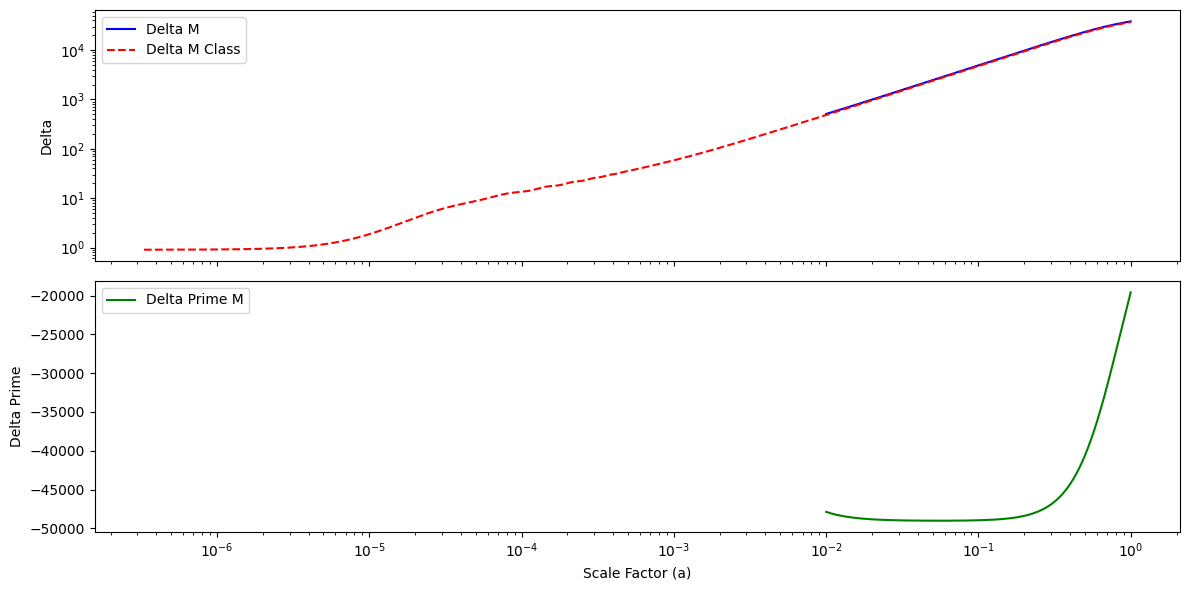

In [164]:
#plot delta and delta_prime
fig, ax= plt.subplots(2,1, figsize=(12, 6), sharex=True)
ax[0].plot(a_vec, -delta_num, label='Delta M', color='blue')
ax[0].plot(a, -delta_m_class, label='Delta M Class', color='red', linestyle='--')
# ax[0].set_xlabel('Scale Factor (a)')
ax[0].set_ylabel('Delta')
#xscale log
ax[0].set_xscale('log')
ax[0].set_yscale('log')
# ax[0].set_title('Delta vs Scale Factor')
ax[0].legend()
ax[1].plot(a_vec, delta_prime_num, label='Delta Prime M', color='green')
ax[1].set_xlabel('Scale Factor (a)')
ax[1].set_ylabel('Delta Prime')
ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[1].set_title('Delta Prime vs Scale Factor')
ax[1].legend()
plt.tight_layout()
plt.show()


In [165]:
from scipy.interpolate import interp1d
def percent_diff_vs_class(a_vec, delta_m, a_class, delta_m_class):
    """
    Interpola la curva de CLASS (o cualquiera) sobre los puntos de integración y calcula el porcentaje de diferencia relativa.
    Si hay valores duplicados en a_class, solo toma el primero.
    """
    a_class = np.asarray(a_class)
    delta_m_class = np.asarray(delta_m_class)
    # Solo eliminar duplicados si existen
    if len(np.unique(a_class)) < len(a_class):
        _, unique_indices = np.unique(a_class, return_index=True)
        a_class = a_class[unique_indices]
        delta_m_class = delta_m_class[unique_indices]
    interp_class = interp1d(a_class, delta_m_class, kind='quadratic',
                            bounds_error=False, fill_value="extrapolate")
    delta_m_class_interp = interp_class(a_vec)
    # percent_diff = 100 * (delta_m - delta_m_class_interp) / delta_m_class_interp
    percent_diff = 100 * (delta_m - delta_m_class_interp) / delta_m_class_interp
    return percent_diff

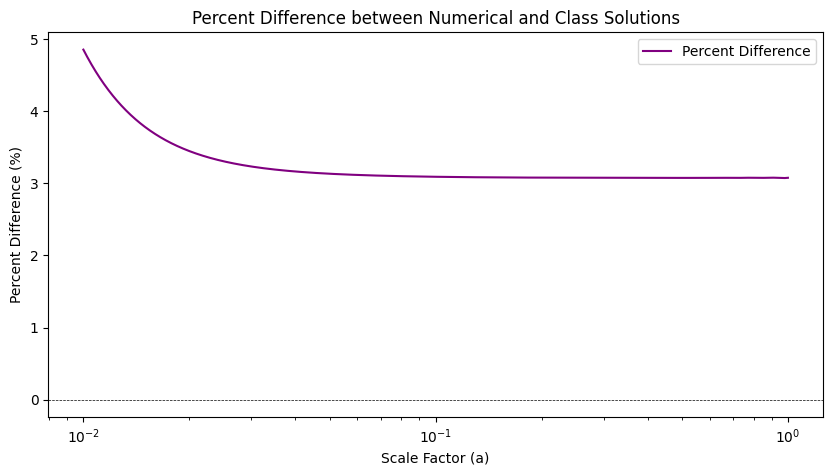

In [167]:
#plot percent difference
percent_diff = percent_diff_vs_class(a_vec, delta_m=delta_num, a_class=a, delta_m_class=delta_m_class)
plt.figure(figsize=(10, 5))
plt.plot(a_vec, percent_diff, label='Percent Difference', color='purple')
plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Scale Factor (a)')
plt.ylabel('Percent Difference (%)')
plt.title('Percent Difference between Numerical and Class Solutions')
plt.legend()
plt.show()

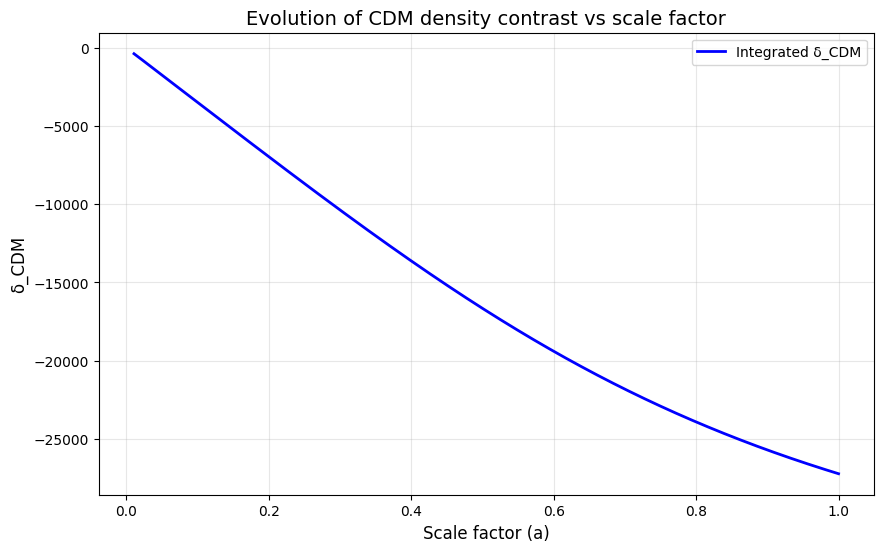


Comparison:
Initial δ_CDM at a = 0.010549: -377.77
Final δ_CDM at a = 1.0: -27234.18
Growth factor: 72.091493


In [ ]:
# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(a_vec, delta_num, 'b-', linewidth=2, label='Integrated δ_CDM')
plt.xlabel('Scale factor (a)', fontsize=12)
plt.ylabel('δ_M', fontsize=12)
plt.title('Evolution of CDM density contrast vs scale factor', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Compare with the initial conditions
print(f"\nComparison:")
print(f"Initial δ_CDM at a = {a0:.6f}: {delta0:.2f}")
print(f"Final δ_CDM at a = 1.0: {delta_num[-1]:.2f}")
print(f"Growth factor: {delta_num[-1]/delta0:.6f}")